## ДЗ №1
Распознать изображение с игральными картами и вывести изображение и номинал каждой карты

In [3]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np


c:\Users\sobak\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sobak\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\sobak\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png

1. Прочитайте изображение из файла и выведите его на экран:


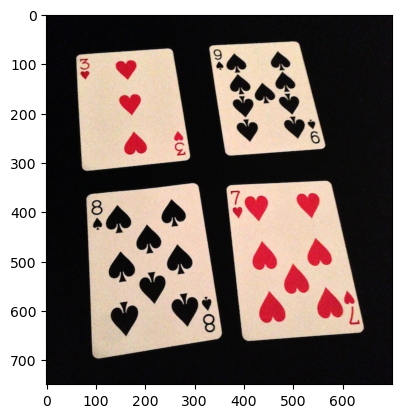

In [4]:
img = imread('http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png') 
plt.imshow(img)

2. Выполните последовательно 2 преобразования: переведите изображение в оттенки серого (COLOR_BGR2GRAY) и примените размытие (GaussianBlur):


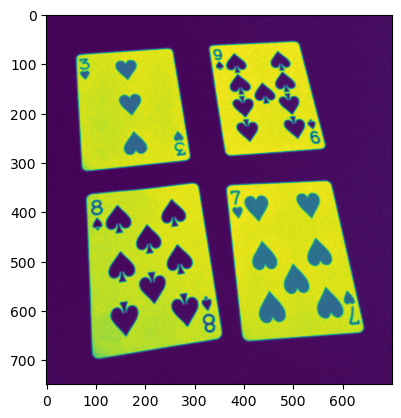

In [5]:
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
blur = cv2.GaussianBlur(grey, (5,5), 0)
plt.imshow(blur)
plt.show()

3. Найдите 4 контура максимального размера и выведите их на исходном изображении:



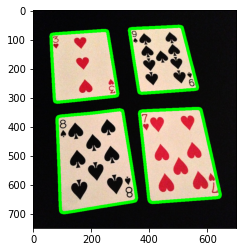

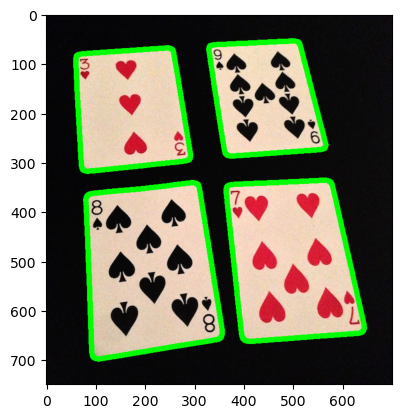

In [18]:
numcards = 4

flag, thresh = cv2.threshold(blur, 30,1, cv2.THRESH_BINARY) # !!! ПОДОБРАТЬ ЗНАЧЕНИЯ ПАРАМЕТРОВ ВМЕCТО ТОЧЕК
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards] # !!! ВСТАВИТЬ КОД ВМЕСТО ТОЧЕК

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)  
plt.imshow(contours_img)
plt.show()

4. Примените к каждому контуру проективное преобразование и выведите отдельным изображением: 

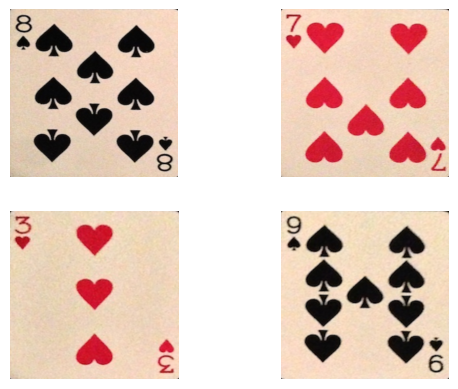

In [24]:
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.boxPoints(rect)
    h = np.array([[0,0],[450,0],[450,450],[0,450]], np.float32) # !!! ПОДОБРАТЬ ЗНАЧЕНИЯ ПАРАМЕТРОВ ВМЕCТО ТОЧЕК
    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]
    plt.subplot(2,2,i+1); plt.axis('off')   
    plt.imshow(warp)

plt.show()

5. Найдите количество символов на одной карте:
- на изображении карты найдите все контуры;
- найдите максимальный контур (не совпадающий с самой картой);
- найдите другие контуры, отличающиеся от максимального по размеру не более 10%;
- посчитайте количество максимальных контуров.

9


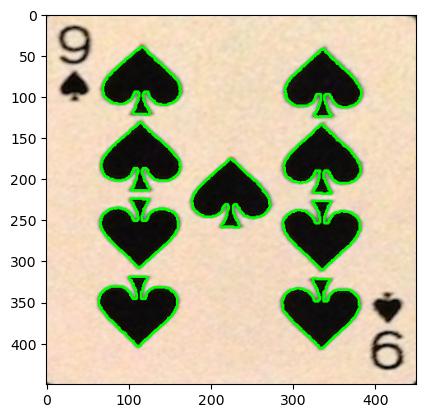

In [26]:
img_gray = cv2.cvtColor(warp,cv2.COLOR_RGB2GRAY)
contours_img = warp.copy()

flag, thresh = cv2.threshold(img_gray, 50, 1, cv2.THRESH_BINARY) # !!! ПОДОБРАТЬ ЗНАЧЕНИЯ ПАРАМЕТРОВ ВМЕCТО ТОЧЕК
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

main_contours = []
main_area = 0
for contour in contours:
  if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
  if main_area == 0:
    main_contours.append(contour)
    main_area = cv2.contourArea(contour)
  else:
    if cv2.contourArea(contour)  > main_area * 0.5 :
      main_contours.append(contour)
print(len(main_contours))

cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
plt.imshow(contours_img)
plt.show()

6. Соберите все предыдущие команды в один код, чтобы на выходе получилось следующее изображение:

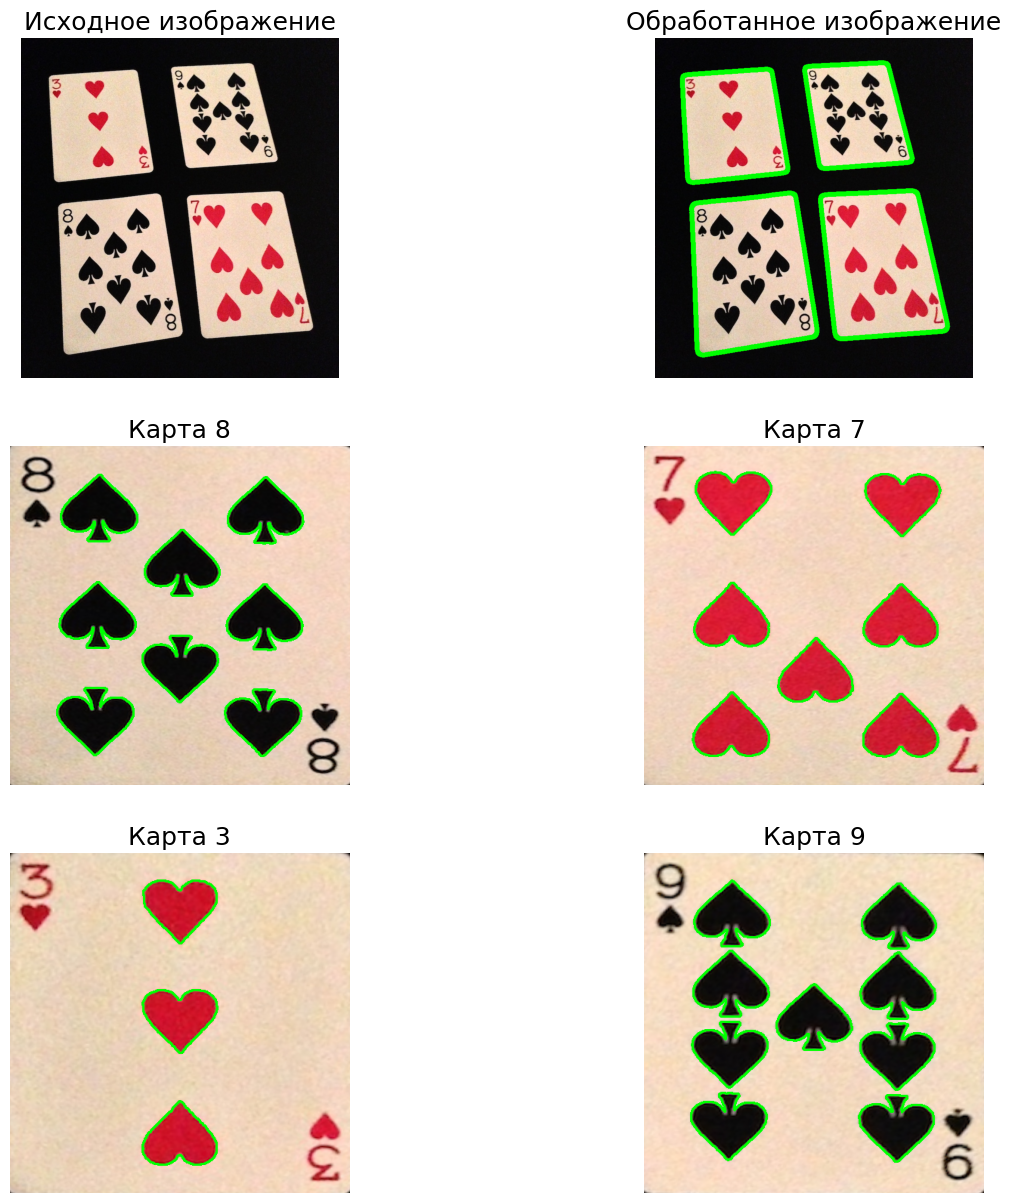

In [32]:
orig_img = imread('http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png')
numcards = 4

flag, thresh = cv2.threshold(blur, 30, 1, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[:numcards]

contours_img = orig_img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
fig = plt.figure(figsize=(15, 15))
rows = 3
columns = 2

img_array = []
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.boxPoints(rect)
    h = np.array([[0,0],[450,0],[450,450],[0,450]], np.float32)
    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(orig_img,transform,(450,450))[:,::-1]
    img_array.append(warp)

plt.subplot(rows, columns, 1)
plt.imshow(orig_img)
plt.axis('off')
plt.title("Исходное изображение", fontsize = 18)
plt.subplot(rows, columns, 2)
plt.imshow(contours_img)
plt.axis('off')
plt.title("Обработанное изображение", fontsize = 18)


for i in range(4):
  img_gray = cv2.cvtColor(img_array[i],cv2.COLOR_RGB2GRAY)
  contours_img = img_array[i].copy()

  flag, thresh = cv2.threshold(img_gray, 150, 1, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)

  main_contours = []
  main_area = 0
  for contour in contours:
    if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
    if main_area == 0:
      main_contours.append(contour)
      main_area = cv2.contourArea(contour)
    else:
      if cv2.contourArea(contour) >  main_area * 0.5:
        main_contours.append(contour)

  img_array[i] = cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)

  fig.add_subplot(rows, columns, 3+i)

  plt.imshow(img_array[i])
  plt.axis('off')
  plt.title('Карта '+str(len(main_contours)), fontsize = 18) 

plt.show()